In [1]:
# Khai báo sử dụng hàm sobel
from matplotlib import pyplot as plt
from skimage.filters import sobel
from skimage import color
import os

In [2]:
path = os.path.abspath("video/san_pham.mp4")
path1 = os.path.abspath("image/thanhpho.jpg")
image = plt.imread(path1)
path2 = os.path.abspath("image/luocdo.jpg")
image2 = plt.imread(path2)
path3 = os.path.abspath("image/xq.jpg")
image3 = plt.imread(path3)
path4 = os.path.abspath("image/coffee.jpg")
image4 = plt.imread(path4)

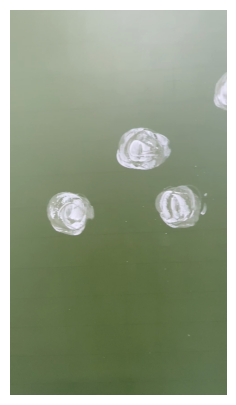

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(path)
frame_index = 100 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()
image1 = frame
if  ret:
        fig = plt.figure(figsize=(10, 5))
        #figsize kích thước ảnh 
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
        cap.release()
else:
    print('Không thể đọc khung hình thứ {} từ video.'.format(frame_index))

In [4]:
# Bài 2.1: Phát hiện cạnh
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

In [5]:
def show_image(image, title='Image', cmap_type='gray'):  
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)  
    plt.axis('off')  
    plt.show()

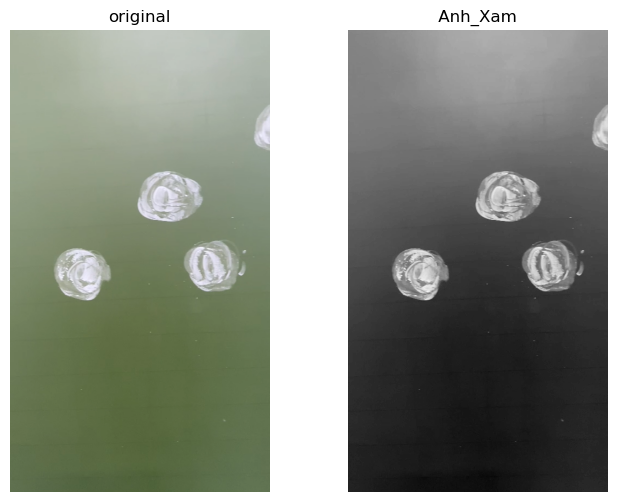

In [6]:
# Chuyển ảnh gốc thành ảnh xám
from skimage import color
image20= color.rgb2gray(image1)
plot_comparison(image1, image20, " Anh_Xam ")

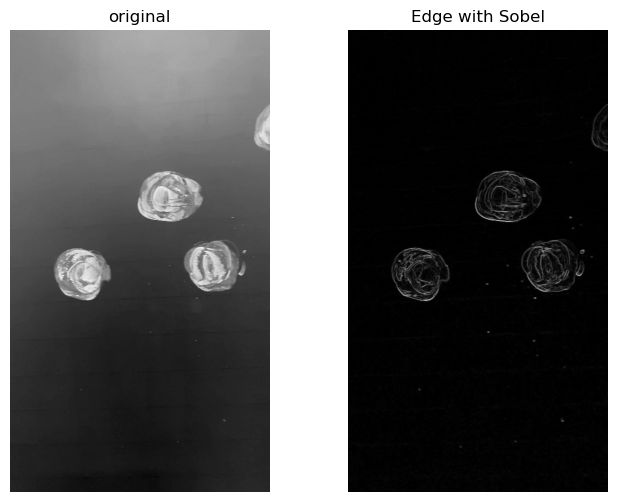

In [7]:
# Áp dụng hàm sobel để lọc cạnh từ ảnh xám
edge_sobel = sobel(image20)
plot_comparison(image20, edge_sobel, "Edge with Sobel")

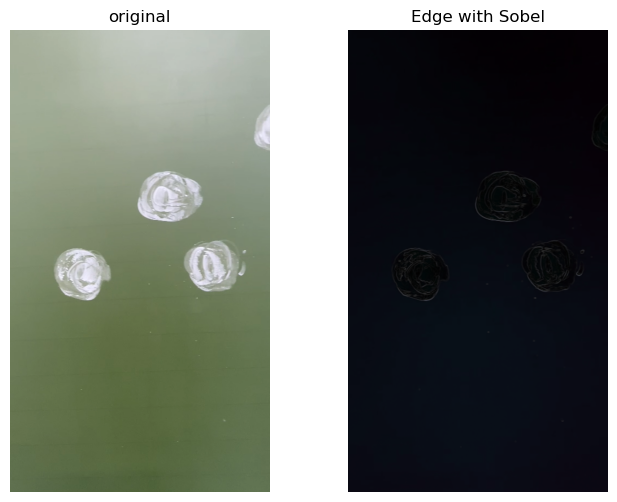

In [8]:
# Áp dụng hàm sobel để lọc cạnh từ ảnh màu
edge_sobel = sobel(image1)
plot_comparison(image1, edge_sobel, "Edge with Sobel")

In [9]:
# Bài 2.2: Lọc nhiễu cho ảnh
# Khai báo sử dụng bộ lọc Gaussian
from skimage.filters import gaussian

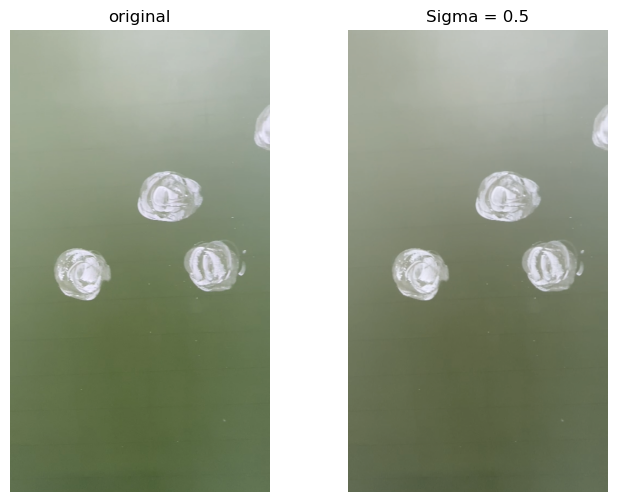

In [10]:
# Áp dụng bộ lọc với Sigma = 0.5
gaussian_image1 = gaussian(image1,sigma=0.5,channel_axis=True)
plot_comparison(image1, gaussian_image1, "Sigma = 0.5")

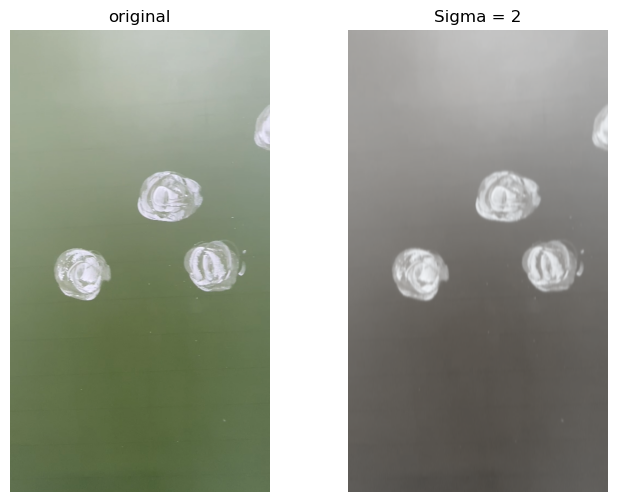

In [11]:
# Áp dụng bộ lọc với Sigma = 2
gaussian_image2 = gaussian(image1,sigma=2,channel_axis=True)
plot_comparison(image1, gaussian_image2, "Sigma = 2")

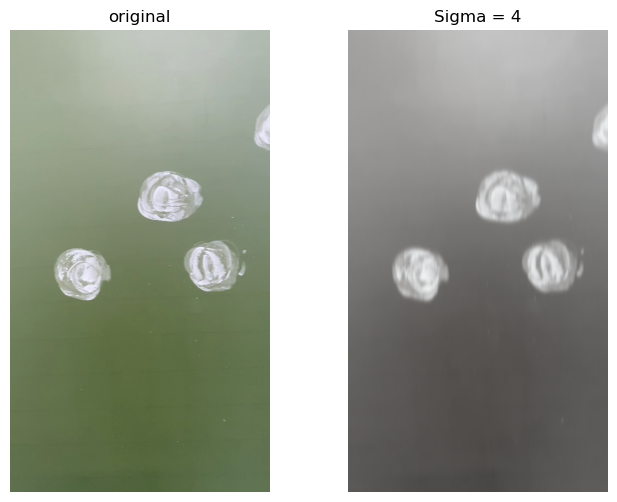

In [12]:
# Áp dụng bộ lọc với Sigma = 4
gaussian_image = gaussian(image1,sigma=4,channel_axis=True)
plot_comparison(image1, gaussian_image, "Sigma = 4")

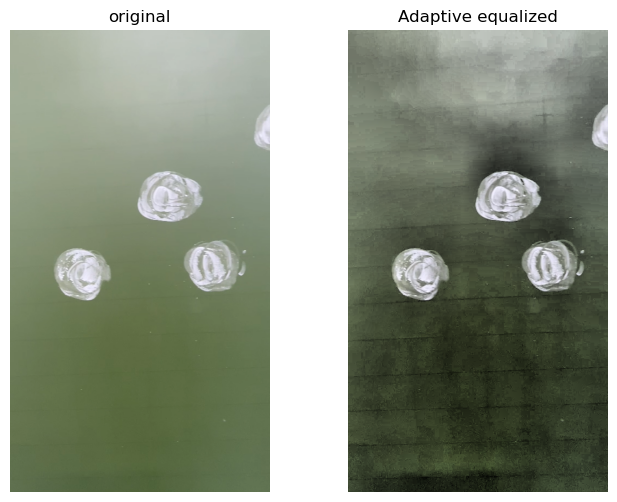

In [21]:
# Bài 2.3 Khảo sát lược đồ mức xám
from skimage import exposure
# Áp dụng cân bằng lược đồ mức xám cục bộ
image_adapteq = exposure.equalize_adapthist(image1,
clip_limit=0.03)
# Hiển thị ảnh gốc và ảnh kết quả
plot_comparison(image1, image_adapteq, 'Adaptive equalized')

C:\Users\DELL\anaconda3\envs\demo_xla\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


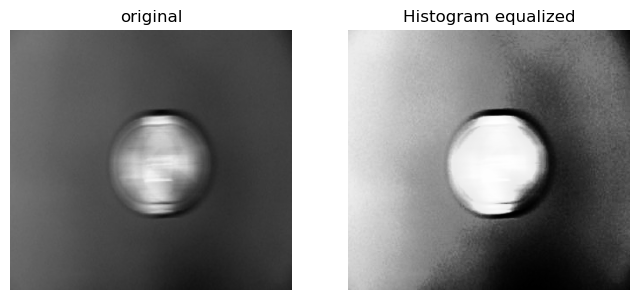

In [14]:
# Áp dụng cân bằng lược đồ mức xám toàn cục
image_eq = exposure.equalize_hist(image2)
# Hiển thị ảnh gốc và kết quả.
plot_comparison(image2, image_eq, 'Histogram equalized')

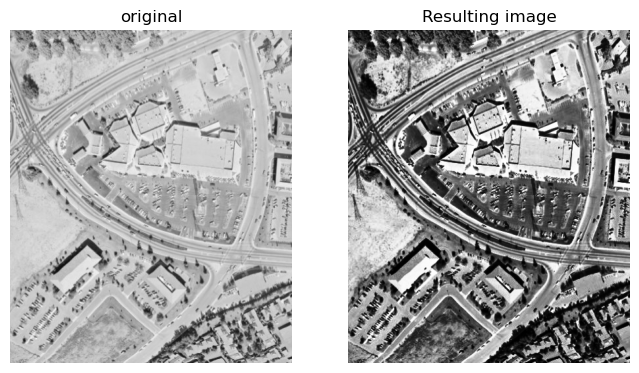

In [15]:
#Bài 2.4: Cân bằng Histogram
from skimage import exposure
# Tiến hành cân bằng lược đồ mức xám
image_eq = exposure.equalize_hist(image)
# Hiển thị ảnh gốc và ảnh kết quả
plot_comparison(image, image_eq, 'Resulting image')

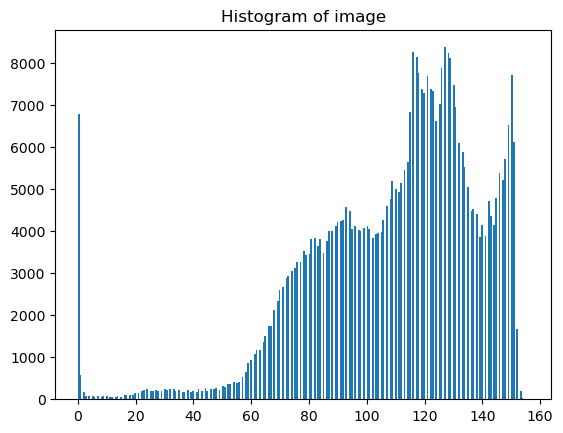

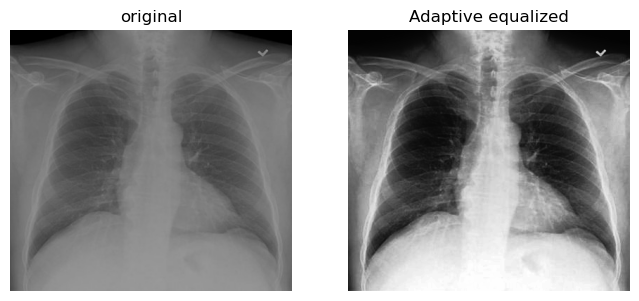

In [16]:
# Bài 2.5: Khảo sát lược đồ mức xám của ảnh y sinh
from skimage import exposure
# Thực hiện cân bằng lược đồ mức xám cho ảnh
image_eq = exposure.equalize_hist(image3)
# chuẩn hóa ảnh DICOM về ngưỡng [0-255]
plt.figure()
plt.axis('on')
plt.hist(image3.ravel(), bins=256 )
plt.title('Histogram of image')
plt.show()
# hiển thị và so sánh kết quả
plot_comparison(image3, image_eq, 'Adaptive equalized')

In [17]:
#Bai 2.6 Tăng cường độ tương phản sử dụng cân bằng lược đồ mức xám cục bộ
# Khai báo các thư viện cần dùng
from skimage import exposure
# Khai báo các gói thư viện cần thiết
from skimage import data, color

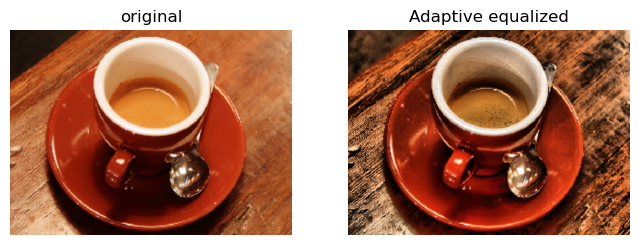

In [18]:
# ứng dụng phương pháp tăng cường cảnh cục bộ để tăng cường độ tương phản của ảnh
adapthist_eq_image =exposure.equalize_adapthist(image4, clip_limit=0.03)
plot_comparison(image4, adapthist_eq_image, 'Adaptive equalized')

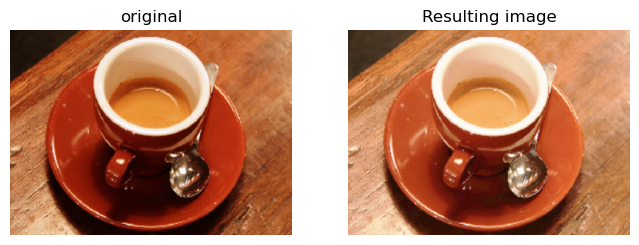

In [19]:
# ứng dụng phương pháp tăng cường cảnh truyền thống để tăng cường độ tương phản của ảnh
image_eq = exposure.equalize_hist(image4)
plot_comparison(image4, image_eq, 'Resulting image')

In [20]:
# Bai 2.7
# Khai báo các thư viện cần thiết
from skimage.transform import rotate,rescale,resize
# Đọc ảnh 
img1 =cv2.imread(os.path.abspath("image/chua.jpg"))

# xoay ảnh thẳng đứng so với ảnh gốc
resizeImg= resize(img1,(256,256))
RotatedImage= rotate(resizeImg,90)



# # Tách một khung ảnh 100*100 cho cả hai trường hợp trên
# #Crop_A=resize (Zoom_2x_A, (100, 100), anti_aliasing=True)
# #Crop_B=resize (Zoom_2x_B, (100, 100), anti_aliasing=True)
# # hiển thị kết quả và so sánh
# plot_comparison(Zoom_2x_A,Zoom_2x_B,"compare")
show_image(Zoom_2x_A, 'with')
show_image(Zoom_2x_B, 'without')


NameError: name 'Zoom_2x_A' is not defined

In [ ]:
## xoay ảnh thẳng đứng so với ảnh gốc
resizeImg= resize(img1,(640,640))
RotatedImage= rotate(resizeImg,90)
plot_comparison(resizeImg,RotatedImage,"Rotated Image")

In [ ]:
# # Tăng kích thước lên 2 lần sử dụng kỹ thuật khử răng cưa\
Zoom_2x_A= rescale(resizeImg,2,anti_aliasing=True,channel_axis=-1)
plot_comparison(resizeImg, Zoom_2x_A, 'zoom 2x')


In [ ]:
# tăng kích thước lên 2 lần không sử dụng kỹ thuật khử răng cưa
Zoom_2x_B= rescale(resizeImg,2,anti_aliasing=False,channel_axis=-1)
plot_comparison(resizeImg, Zoom_2x_B, 'zoom 2x')

In [ ]:
#Bai 8
# Khai báo các thư viện cần sử dụng
from skimage.transform import rescale
height = image1.shape[0]*1.5
width = image1.shape[1]*1.5
# Tăng kích thước ảnh lên 3 lần
Zoom_3x_image = resize(image1,(height,width),anti_aliasing=True)

#show_image(Zoom_3x_image, "3 times enlarged image")
plot_comparison(image1,Zoom_3x_image,"3x image")

In [ ]:
#Bài 9 
# Khai báo thư viện cần dùng
from skimage.transform import resize
# khai báo chiều dài và chiều rộng của cột sau khi xử lý thay đổi kích thước ảnh
height = int(image1.shape[0] / 1.41)
width = int(image1.shape[1] / 1.41)
# Thực hiện thay đổi kích thước ảnh g
image_resized = resize(image1, (height, width), anti_aliasing=True)
# Hiển thị kết quả và so sánh

plot_comparison(image1,image_resized,'Resized image')

In [ ]:
#
# Khai báo thư viện morphology
from skimage import morphology

from skimage.filters import threshold_otsu
# Chuyển ảnh màu sang ảnh xám bằng hàm rgb2gray
image1_gray = color.rgb2gray(image1)
show_image(image1_gray)
print([image1_gray.min(), image1_gray.max()])


In [ ]:
thresh = threshold_otsu(image1_gray)
print(thresh)

In [ ]:
binary_img=image1_gray> 0.79
show_image(binary_img)

In [ ]:
selem = morphology.rectangle(12,6)
erase= morphology.binary_erosion(binary_imag,selem=morphology.rectangle(3,3))

# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion
dilated_image = morphology.binary_dilation(erase,selem=selem)
#sellem hình dạng lọc
show_image(dilated_image,"dilated_image")

In [ ]:
thresh = threshold_otsu(image1_gray)
# Lấy ngưỡng cho ảnh xám
image_binary = image1_gray > 0.8
print(thresh)
# Định nghĩa thành phần cấu trúc là một hình chữ nhật 12x6
selem = morphology.rectangle(3,3)
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion

dilated_image = morphology.binary_dilation(image_binary,selem=selem)
show_image(dilated_image, 'Dilated image')

# Thực hiện việc xói mòn các điểm ảnh để loại bỏ những điểm ảnh thừa

eroded_image_shape = morphology.binary_erosion(dilated_image,selem=selem)
# Hiển thị kết quả
show_image(image_binary, 'Original')
show_image(eroded_image_shape, 'Eroded image')

In [ ]:
#Khai báo thư viện cần sử dụng
from skimage import morphology
# Giãn nở ảnh
selem = morphology.rectangle(3,3)
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion

dilated_image = morphology.binary_dilation(image_binary,selem=selem)

# Hiển thị kết quả và so sánh
show_image(image_binary, 'Original')
show_image(dilated_image, 'Dilated image')